## Limpieza del Dataset

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

#### PASO 1: Cargar el Dataset

In [4]:
#En este paso, cargamos el archivo CSV con los datos de tráfico de red. 

df = pd.read_csv("../archive/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")


##### Detalles del dataset
Estamos cargando un CSV que contiene una lista de logs en los que hay posibles ataques DDos

In [5]:
# También mostramos las primeras filas del dataset para entender y previsualizar su contenido.
print("\n### Primeras filas del dataset:")
print(df.head())


### Primeras filas del dataset:
    Destination Port   Flow Duration   Total Fwd Packets  \
0              54865               3                   2   
1              55054             109                   1   
2              55055              52                   1   
3              46236              34                   1   
4              54863               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        1                            6   
2                        1                            6   
3                        1                            6   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             6                       6   
2                             6                       6   
3              

# Analisis de las Columnas del Dataset CIC-IDS2017

Este dataset contiene múltiples columnas con información detallada sobre el tráfico de red. A continuación, se describen las más relevantes:

## 🔹 1. Información sobre el Flujo de Red  
- **Destination Port**: Puerto de destino del tráfico.  
- **Flow Duration**: Duración total del flujo en milisegundos.  
- **Total Fwd Packets**: Número total de paquetes enviados en dirección forward.  
- **Total Backward Packets**: Número total de paquetes enviados en dirección backward.  

## 🔹 2. Características de los Paquetes  
- **Total Length of Fwd Packets**: Longitud total de los paquetes enviados en dirección forward.  
- **Total Length of Bwd Packets**: Longitud total de los paquetes enviados en dirección backward.  
- **Fwd Packet Length Max / Min / Mean / Std**: Medidas estadísticas de la longitud de los paquetes enviados en forward.  
- **Bwd Packet Length Max / Min / Mean / Std**: Medidas estadísticas de la longitud de los paquetes enviados en backward.  

## 🔹 3. Estadísticas de Tasa de Flujo  
- **Flow Bytes/s**: Número de bytes transmitidos por segundo en el flujo.  
- **Flow Packets/s**: Número de paquetes transmitidos por segundo.  
- **Flow IAT Mean / Max / Min / Std**: Intervalo de tiempo promedio, máximo, mínimo y desviación estándar entre paquetes en el flujo.  

## 🔹 4. Información sobre Flags y Señales de Control  
- **SYN Flag Count / FIN Flag Count / RST Flag Count**: Contadores de los flags TCP utilizados en el flujo.  
- **PSH Flag Count / ACK Flag Count / URG Flag Count**: Contadores de otros flags de control TCP.  

## 🔹 5. Información sobre la Ventana TCP  
- **Init_Win_bytes_forward**: Tamaño de la ventana TCP en la dirección forward.  
- **Init_Win_bytes_backward**: Tamaño de la ventana TCP en la dirección backward.  

## 🔹 6. Estado del Tráfico (Label)  
- **Label**: Indica si el tráfico es `BENIGN` (normal) o pertenece a un ataque específico como `DDoS`, `PortScan`, etc.  

---
**Estas características se utilizarán para entrenar un modelo de IA que pueda detectar patrones de tráfico malicioso en redes.**


In [6]:
# Revisamos cuántos valores nulos hay en cada columna.
print("\n### Valores nulos en el dataset:")
print(df.isnull().sum()[df.isnull().sum() > 0]) 



### Valores nulos en el dataset:
Flow Bytes/s    4
dtype: int64


**Interpretacion de resultados:**
Vemos que solo hay 4 valores nulos en el dataset, por tanto como son pocos valores nulos vamos a eliminarlos del dataset. Si fuesen muchos valores Nan podríamos reemplazarlos por la media de la columna para no borrar mucha información.

In [7]:
# Eliminamos las filas que contienen valores nulos.
df.dropna(inplace=True)

#comprobamos que no haya valores nulos
print("\n### Valores nulos en el dataset:")
print(df.isnull().sum()[df.isnull().sum() > 0])

df.columns = df.columns.str.strip()  # Elimina espacios en los nombres de columnas





### Valores nulos en el dataset:
Series([], dtype: int64)


# Eliminación de Datos Duplicados

En el preprocesamiento de datos, es fundamental eliminar los registros duplicados, ya que pueden afectar el rendimiento del modelo de aprendizaje automático. Los duplicados pueden surgir debido a errores en la recopilación de datos o repeticiones en la generación del dataset.

## ¿Por qué eliminamos los duplicados?

- **Evita sesgos en el entrenamiento**: Si una clase tiene más registros duplicados, el modelo puede sobreajustarse a esos datos y generalizar mal en nuevos casos.
- **Optimiza el uso de recursos**: Trabajar con datos redundantes aumenta el consumo de memoria y tiempo de cómputo sin aportar nueva información útil.
- **Mejora la calidad del dataset**: Un dataset sin duplicados garantiza que cada muestra contribuye con información única al modelo, favoreciendo su capacidad de aprendizaje.

En este proceso, identificamos y eliminamos registros duplicados utilizando la función `drop_duplicates()`, asegurando que el dataset final contenga únicamente datos relevantes y sin repeticiones innecesarias.


In [8]:
# ## 4️⃣ Eliminación de Datos Duplicados
# Algunos registros pueden estar duplicados, lo que afectaría el análisis.
print("\n### Cantidad de datos duplicados antes de eliminarlos:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Cantidad de datos duplicados después de eliminarlos:", df.duplicated().sum())



### Cantidad de datos duplicados antes de eliminarlos: 2633
Cantidad de datos duplicados después de eliminarlos: 0


# Conversión de Datos Categóricos

En los modelos de aprendizaje automático, es necesario que todas las variables sean numéricas, ya que la mayoría de los algoritmos no pueden procesar datos en formato de texto. En este dataset, la columna `Label` indica si el tráfico es benigno o corresponde a un ataque, pero está representada como valores categóricos en texto (`BENIGN`, `DDoS`, etc.).

## ¿Por qué convertimos los datos categóricos?

- **Compatibilidad con modelos de IA**: La mayoría de los algoritmos de aprendizaje automático solo funcionan con datos numéricos.
- **Estandarización del dataset**: Facilita la comparación entre distintas clases dentro del modelo.
- **Optimización del procesamiento**: Representar los valores categóricos como números reduce el tiempo de cómputo.

Para esta conversión, se utiliza `LabelEncoder()`, que asigna un número a cada categoría, permitiendo que el modelo pueda interpretar correctamente la variable `Label` sin perder información.


In [9]:
# ## 5️⃣ Conversión de Datos Categóricos
# La columna 'Label' indica si el tráfico es benigno o un ataque. Convertimos los valores de texto a números.
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)


#Comprobamos que se haya hecho la conversión
print("\n### Columna 'Label' después de la conversión:")
print(df['Label'].value_counts())


### Columna 'Label' después de la conversión:
Label
1    128016
0     95092
Name: count, dtype: int64


# Normalización de Datos Numéricos

En el preprocesamiento de datos, es fundamental escalar las variables numéricas para mejorar el rendimiento del modelo de aprendizaje automático. La normalización ayuda a que los modelos sean más estables y precisos, especialmente en algoritmos sensibles a la escala de los datos, como redes neuronales y SVM.

## ¿Por qué normalizamos los datos?

- **Diferentes escalas pueden afectar el modelo**: Algunas características tienen valores muy grandes (ej. `Flow Bytes/s`), mientras que otras tienen valores pequeños (`Packet Length`). Si no se normalizan, el modelo podría dar más importancia a ciertas variables solo por su magnitud.
- **Mejora la convergencia del entrenamiento**: Los modelos basados en gradiente (como redes neuronales) entrenan más rápido y de manera más estable con datos normalizados.
- **Evita sesgos en la clasificación**: Al escalar todas las variables a una misma escala, evitamos que unas características dominen sobre otras.

## ¿Cómo lo hacemos?

Utilizamos `StandardScaler()` de `sklearn.preprocessing`, que transforma los datos para que tengan una media de 0 y desviación estándar de 1. Esto se aplica a todas las columnas numéricas del dataset.

Después de este paso, los datos estarán listos para ser utilizados en el modelo de IA sin riesgo de que la escala de los valores afecte negativamente el entrenamiento.


In [10]:
# ## 6️⃣ Normalización de Datos Numéricos

# Reemplazamos valores infinitos con la media de la columna
df.replace([float('inf'), float('-inf')], pd.NA, inplace=True)
df.fillna(df.mean(), inplace=True)

# Verificamos si aún quedan valores nulos después de corregir infinitos
print("\n### Valores nulos después de corregir infinitos:")
print(df.isnull().sum().sum())  # Debería ser 0

# Definimos columnas que NO se deben escalar
columnas_excluir = [
    'Label', 'Destination Port',
    'Fwd PSH Flags', 'Bwd PSH Flags',
    'Fwd URG Flags', 'Bwd URG Flags',
    'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count',
    'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count',
    'CWE Flag Count', 'ECE Flag Count'
]

# Guardamos una copia de esas columnas para unirlas después
columnas_excluidas_df = df[columnas_excluir].reset_index(drop=True)

# Escalamos solo las columnas numéricas válidas
scaler = StandardScaler()
X = df.drop(columns=columnas_excluir)
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Unimos los datos escalados con las columnas excluidas del escalado
df = pd.concat([X_scaled, columnas_excluidas_df], axis=1)

print("\n### Normalización completada correctamente.")

/tmp/ipykernel_7847/2669919505.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.mean(), inplace=True)



### Valores nulos después de corregir infinitos:
0

### Normalización completada correctamente.


## Interpretación de Valores Normalizados en el Dataset

Durante la fase de preprocesamiento, se aplicó la técnica de normalización mediante `StandardScaler()` de `scikit-learn` sobre todas las variables numéricas continuas del dataset.

### ¿Qué hace StandardScaler?

Esta técnica transforma cada variable numérica de acuerdo a la siguiente fórmula:

\[
X_{\text{normalizado}} = \frac{X - \mu}{\sigma}
\]

Donde:
- \( X \) es el valor original
- \( \mu \) es la media de la columna
- \( \sigma \) es la desviación estándar de la columna

### ¿Qué efecto tiene?

- La **media** de cada variable se convierte en **0**.
- La **desviación estándar** se convierte en **1**.
- Los datos quedan escalados de forma que todas las variables tienen el mismo rango relativo.

### ¿Por qué aparecen valores negativos y decimales?

Después de aplicar esta transformación:

- Los valores **por debajo de la media original** aparecen como números **negativos**.
- Los valores **por encima de la media** son **positivos**.
- Todos los valores son **decimales**, ya que están estandarizados.

Esto es completamente normal y **no implica que los valores originales fueran negativos**. Por ejemplo:

- Un valor `-0.31` en la columna `Fwd Packet Length Mean` significa que el tamaño medio de los paquetes en ese flujo está ligeramente por debajo de la media general.
- Un valor de `2.5` en `Flow Duration` indicaría que la duración del flujo está 2.5 desviaciones estándar por encima de la media del dataset.

### Ventajas de la Normalización

- Evita que variables con valores muy grandes dominen el aprendizaje del modelo.
- Mejora la eficiencia y estabilidad de algoritmos como SVM, KNN o redes neuronales.
- Hace que todas las variables aporten al modelo en igualdad de condiciones.

### Conclusión

La presencia de valores negativos y decimales es una consecuencia directa y esperada de la normalización. Estos valores no representan los datos originales en escala real, sino una transformación estandarizada que permite un entrenamiento más equilibrado y efectivo del modelo.


In [15]:
# ## 7️⃣ Guardar Dataset Limpio
# Finalmente, guardamos el dataset limpio en un nuevo archivo CSV.
cleaned_file_path = "../archive/cleaned_dataset.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"\n### Dataset limpio guardado en: {cleaned_file_path}")


## Resumen del Dataset Preprocesado – CICIDS2017

Antes de entrenar el modelo de regresión logística, es importante entender la estructura del dataset que se está utilizando. A continuación, se presenta una tabla resumen con información clave del dataset preprocesado:

- **Número de muestras**: cantidad total de flujos de red registrados tras la limpieza.
- **Número de columnas**: número de características utilizadas como variables predictoras.
- **Columnas seleccionadas (ejemplo)**: muestra representativa de las variables disponibles.
- **Distribución de clases**: proporción entre tráfico malicioso y benigno.

Este resumen permite confirmar que el dataset es adecuado para el entrenamiento y que está equilibrado de forma razonable para una clasificación binaria.


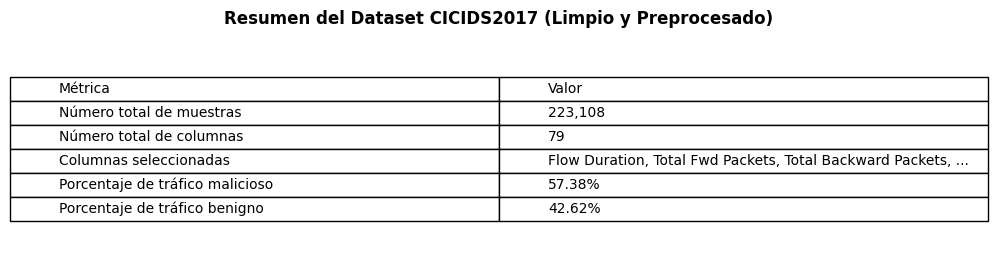

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset limpio
df = pd.read_csv("../archive/cleaned_dataset.csv")

# Calcular estadísticas clave
num_muestras = df.shape[0]
num_columnas = df.shape[1]
columnas_seleccionadas = list(df.columns)
porcentaje_malicioso = (df['Label'].sum() / num_muestras) * 100
porcentaje_benigno = 100 - porcentaje_malicioso

# Crear DataFrame resumen
resumen_df = pd.DataFrame({
    "Métrica": [
        "Número total de muestras",
        "Número total de columnas",
        "Columnas seleccionadas",
        "Porcentaje de tráfico malicioso",
        "Porcentaje de tráfico benigno"
    ],
    "Valor": [
        f"{num_muestras:,}",
        num_columnas,
        ", ".join(columnas_seleccionadas[:3]) + ", ...",
        f"{porcentaje_malicioso:.2f}%",
        f"{porcentaje_benigno:.2f}%"
    ]
})

# Dibujar tabla como gráfico
fig, ax = plt.subplots(figsize=(10, 2.8))
ax.axis('off')
tabla = ax.table(cellText=resumen_df.values,
                 colLabels=resumen_df.columns,
                 cellLoc='left',
                 loc='center',
                 colLoc='left')
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.2, 1.4)

plt.title("Resumen del Dataset CICIDS2017 (Limpio y Preprocesado)", fontsize=12, weight='bold', pad=10)
plt.tight_layout()
plt.show()
